In [37]:
import numpy as np
import matplotlib.pyplot as plt

NUM_CLUSTERS = 2


In [38]:
def generate_multivariate_data(mean1, mean2, covariance_matrix1, covariance_matrix2, num_samples=10000):
    data1 = np.random.multivariate_normal(mean1, covariance_matrix1, num_samples//2)
    data2 = np.random.multivariate_normal(mean2, covariance_matrix2, num_samples//2)
    return np.concatenate([data1, data2])

In [39]:
def plot_scatter_data(data):
    plt.scatter(data[:5000, 0], data[:5000, 1], label="Data1", alpha=0.5, c="r")
    plt.scatter(data[5000:, 0], data[5000:, 1], label="Data2", alpha=0.5, c="g")
    plt.title("Scatter Plot of Multivariate Gaussian Data")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

In [40]:
def plot_kmeans_result(data, kmeans):
    plt.scatter(data[:, 0], data[:, 1], c=kmeans.assignments, cmap='viridis', alpha=0.5, edgecolors='w')
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', marker='X', s=50, label='Cluster Centers')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering Results')

    plt.legend()
    plt.show()

In [41]:
def plot_gaussian_ellipse(mean, covariance, ax=None, color='red'):    
    if ax is None:
        ax = plt.gca()

    eigenvalues, eigenvectors = np.linalg.eigh(covariance)
    order = eigenvalues.argsort()[::-1]
    eigenvalues, eigenvectors = eigenvalues[order], eigenvectors[:, order]
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    ellipse = plt.matplotlib.patches.Ellipse(mean, 2 * np.sqrt(2.0 * eigenvalues[0]), 2 * np.sqrt(2.0 * eigenvalues[1]), angle=angle, color=color, alpha=0.2)
    ax.add_patch(ellipse)


In [59]:
def plot_gmm_result(data, gmm, labels):    
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', alpha=0.5, edgecolors='w')
    plt.scatter(gmm.means[:, 0], gmm.means[:, 1], c='red', marker='X', s=50, label='Cluster Centers')
    for i in range(NUM_CLUSTERS):
        plot_gaussian_ellipse(gmm.means[i], gmm.covariances[i])

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('GMM Clustering Results')
    plt.legend()
    plt.show()


In [44]:
class GaussianMixtureModel:
	def __init__(self, n_components, max_iters = 100):
		self.n_components = n_components
		self.max_iters = max_iters
		self.means = None
		self.covariances = None
		self.weights = None

	def multivariate_normal_pdf(self, x, mean, covariance):
		dimension = len(mean)
		precision_matrix = np.linalg.inv(covariance)

		x = np.atleast_2d(x)
		exponent_term = -0.5 * np.sum(np.dot((x - mean), precision_matrix) * (x - mean), axis=1)
		normalization_term = 1 / (np.sqrt((2 * np.pi) ** dimension * np.linalg.det(covariance)))

		return normalization_term * np.exp(exponent_term)

	def expectation_step(self, data):
		responsibilities = np.zeros((len(data), self.n_components))

		for k in range(self.n_components):
			responsibilities[:, k] = self.weights[k] * self.multivariate_normal_pdf(data, self.means[k], self.covariances[k])

		responsibilities /= np.sum(responsibilities, axis=1, keepdims=True)
		return responsibilities

	def maximization_step(self, data, responsibilities):
		self.weights = np.sum(responsibilities, axis=0) / len(data)
		self.means = np.dot(responsibilities.T, data) / np.sum(responsibilities, axis=0, keepdims=True).T
		self.covariances = []

		for k in range(self.n_components):
			diff = data - self.means[k]
			covariance = np.dot(responsibilities[:, k] * diff.T, diff) / np.sum(responsibilities[:, k])
			self.covariances.append(covariance)

	def fit(self, data, num_iterations=100):
		num_samples, num_features = data.shape
		self.means = data[np.random.choice(num_samples, self.n_components, replace=False)]
		self.covariances = [np.eye(num_features) for _ in range(self.n_components)]
		self.weights = np.ones(self.n_components) / self.n_components

		for _ in range(num_iterations):
			responsibilities = self.expectation_step(data)
			self.maximization_step(data, responsibilities)

	def predict(self, data):
		responsibilities = self.expectation_step(data)
		predicted_labels = np.argmax(responsibilities, axis=1)
		return predicted_labels

In [45]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.centroids = None
        self.assignments = None

    def fit(self, data, max_iterations):
        self.centroids = data[np.random.choice(range(len(data)), self.k, replace=False)]
        
        for _ in range(max_iterations):
            self.assignments = np.argmin(np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2), axis=1)
            new_centroids = np.array([data[self.assignments == j].mean(axis=0) for j in range(self.k)])
            
            if np.array_equal(self.centroids, new_centroids):
                break
            
            self.centroids = new_centroids
    
    def predict(self, data):
        return np.argmin(np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2), axis=1)

In [46]:
mean1_a = np.array([2, 1])
mean2_a = np.array([2, -1])
covariance_matrix_a = np.array([[2, -1], [-1, 1]])

mean1_b = np.array([2, 1])
mean2_b = np.array([-2, -1])
covariance_matrix_b1 = np.array([[2, -1], [-1, 1]])
covariance_matrix_b2 = np.array([[2, 2], [2, 3]])

data1 = generate_multivariate_data(mean1_a, mean2_a, covariance_matrix_a, covariance_matrix_a, 10000)
data2 = generate_multivariate_data(mean1_b, mean2_b, covariance_matrix_b1, covariance_matrix_b2, 10000)

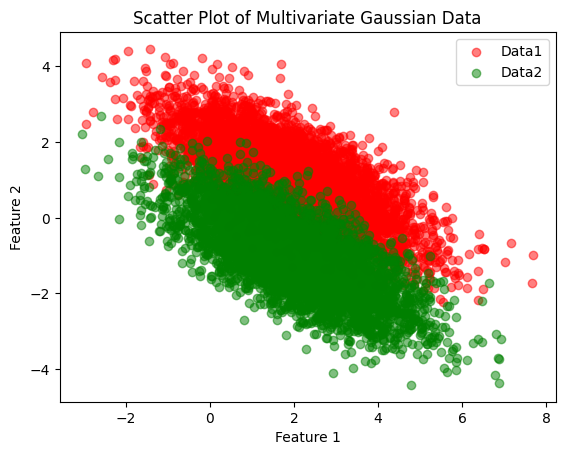

In [47]:
plot_scatter_data(data1)

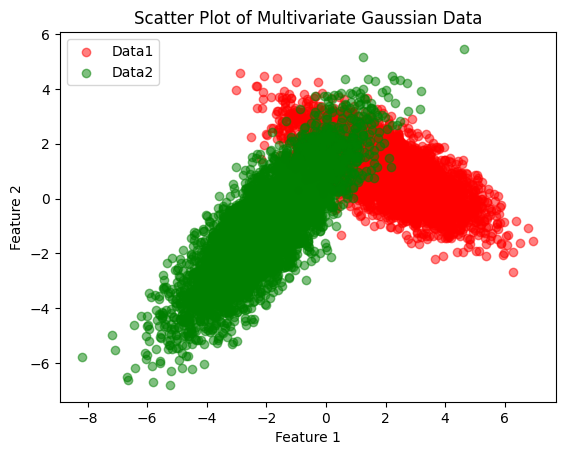

In [49]:
plot_scatter_data(data2)

In [50]:
print(np.cov(data1, rowvar=False))
print(np.cov(data2, rowvar=False))

[[ 2.043234   -1.06079843]
 [-1.06079843  2.05619371]]
[[6.04552263 2.5511194 ]
 [2.5511194  3.01134753]]


Ortalama (Means): [[ 2.00343328 -1.04157463]
 [ 1.9755583   0.99578113]]
Kovaryans (Covariances): [array([[ 1.97834895, -1.01141003],
       [-1.01141003,  0.97174298]]), array([[ 2.10357223, -1.07956354],
       [-1.07956354,  1.06392466]])]
Ağırlıklar (Weights): [0.48502674 0.51497326]


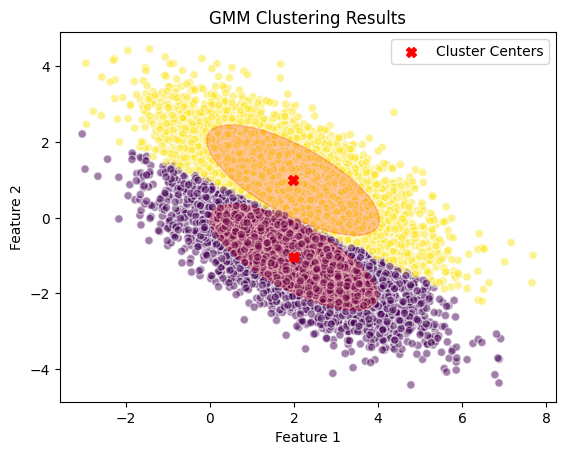

In [60]:
np.random.seed(42)
gmm = GaussianMixtureModel(NUM_CLUSTERS)
gmm.fit(data1)
labels = gmm.predict(data1)

print("Ortalama (Means):", gmm.means)
print("Kovaryans (Covariances):", gmm.covariances)
print("Ağırlıklar (Weights):", gmm.weights)

plot_gmm_result(data1, gmm, labels)

Final centroids:
 [[ 1.00479756  1.02164968]
 [ 2.96864602 -1.00157575]]
Assignments:
 [0 1 0 ... 1 1 0]


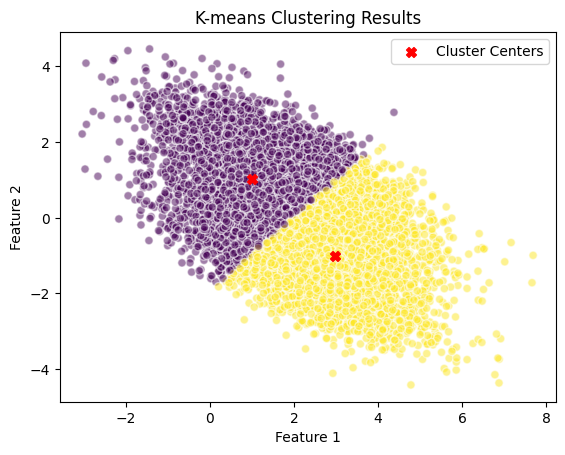

In [54]:
kmeans = KMeans(k=NUM_CLUSTERS)
kmeans.fit(data1, 100)

print("Final centroids:\n", kmeans.centroids)
print("Assignments:\n", kmeans.assignments)
plot_kmeans_result(data1, kmeans)

Ortalama (Means): [[-2.00771586 -1.02244306]
 [ 2.01985048  0.99007611]]
Kovaryans (Covariances): [array([[2.0059224 , 2.00271385],
       [2.00271385, 3.00239535]]), array([[ 1.97341834, -0.97366001],
       [-0.97366001,  0.98103453]])]
Ağırlıklar (Weights): [0.50337357 0.49662643]


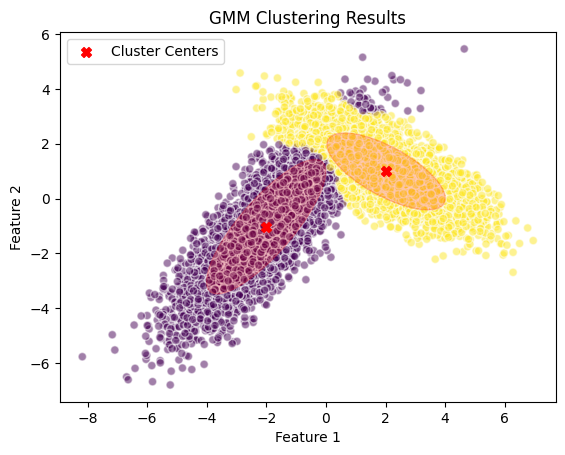

In [61]:
np.random.seed(42)
gmm = GaussianMixtureModel(NUM_CLUSTERS)
gmm.fit(data2)
labels = gmm.predict(data2)

print("Ortalama (Means):", gmm.means)
print("Kovaryans (Covariances):", gmm.covariances)
print("Ağırlıklar (Weights):", gmm.weights)

plot_gmm_result(data2, gmm, labels)

Final centroids:
 [[ 1.70020246  1.04365455]
 [-2.45483996 -1.55154594]]
Assignments:
 [0 0 0 ... 1 0 1]


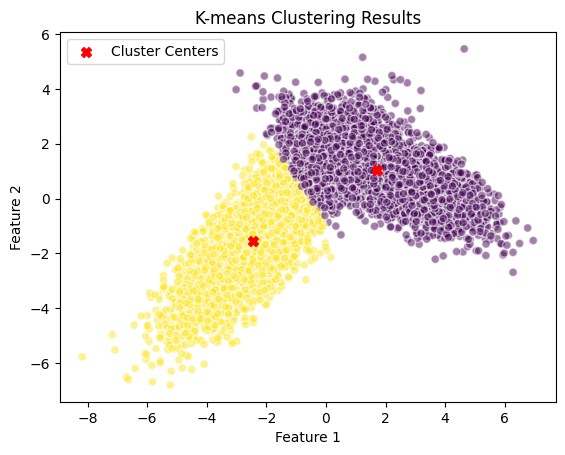

In [62]:
kmeans = KMeans(k=NUM_CLUSTERS)
kmeans.fit(data2, 100)

print("Final centroids:\n", kmeans.centroids)
print("Assignments:\n", kmeans.assignments)
plot_kmeans_result(data2, kmeans)